### **Análisis de Noticias Falsas recopiladas**

En este Notebook vamos a estar analizando las noticias falsas en español recopiladas.Estos datos fueron obtenidos de paginas de fact-checking mediante la tecnica de web scrapping.

A modo de estandarizar la informacion, se cambiara las labels de la siguiente manera en caso de que corresponda:

* True : 1
* False : 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_4520/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **1. Analisis de Datos de fuentes**

**Objetivos de la sección:**

*   Estudiar el formato de los datos de las distintas fuentes

*   Clasificar los datos en caso de ser necesario

*   Unificar las clasificaciones por una escala entre 1 y 0 segun corresponda

*   Unificar el nombre de las columnas y eliminar las sobrantes

#### **Dataset encontrado en Github [*FakeStorage*]**

Este proyecto está dirigido a la construcción de un dataset de noticias falsas (o "fake news") en internet que estén en español. Con este dataset buscamos contribuir a la construcción de sistemas para identificar noticias falsas en internet. El dataset sigue en construcción.

La carpeta obtenida contaba con los siguientes archivos: 
 * fakenewsMaldita.json
 * fakenewsNewtral.json
 * fakenewsNewtral_old.json



Para mas informacion visitar el siguiente [enlace](https://github.com/alcorpas10/FakesStorage) al repositorio.



In [29]:
maldita = pd.read_json("data/FakeStorage/fakenewsMaldita.json").transpose()
maldita.head()

,titulo,link,date,words_count
0,"No, los datos de positivos de un estudio de la...",https://maldita.es/malditobulo/20211220/complu...,2021/12/20,"{'no': 13, 'los': 15, 'datos': 8, 'de': 76, 'p..."
1,La imagen de la cafeteria del Congreso de los ...,https://maldita.es/malditobulo/20211220/cafete...,2021/12/20,"{'la': 32, 'imagen': 5, 'de': 31, 'cafeteria':..."
2,Como los antivacunas han utilizado el problema...,https://maldita.es/malditobulo/20211220/kun-ag...,2021/12/20,"{'como': 6, 'los': 9, 'antivacunas': 1, 'han':..."
3,"No, Mexico no permite modificar el acta de nac...",https://maldita.es/malditobulo/20211220/mexico...,2021/12/20,"{'no': 7, 'mexico': 8, 'permite': 3, 'modifica..."
4,"No, esta ilustracion del artista Walter Molino...",https://maldita.es/malditobulo/20211220/pintur...,2021/12/20,"{'no': 5, 'esta': 1, 'ilustracion': 6, 'del': ..."


In [30]:
maldita.shape

(5640, 4)

In [31]:
newtral = pd.read_json("data/FakeStorage/fakenewsNewtral.json").transpose()
newtral.head()

,titulo,link,date,words_count
0,Las vacunas contienen óxido de grafeno. Estas ...,https://www.newtral.es/carta-carlos-martinez-v...,20/12/2021,"{'las': 29, 'vacunas': 20, 'contienen': 3, 'ox..."
1,Este cuadro de una joven amamantando a un anci...,https://www.newtral.es/jules-lefebvre-cuadro-v...,20/12/2021,"{'este': 6, 'cuadro': 6, 'de': 60, 'una': 16, ..."
2,Las personas que han estado en la discoteca TA...,https://www.newtral.es/brote-discoteca-tenerif...,17/12/2021,"{'las': 14, 'personas': 3, 'que': 46, 'han': 7..."
3,Ursula Van Der Leyen (sic) dijo a la prensa qu...,https://www.newtral.es/von-der-leyen-codigo-nu...,17/12/2021,"{'ursula': 6, 'van': 1, 'der': 11, 'leyen': 11..."
4,Secuestran [en Australia] para inocular a la h...,https://www.newtral.es/nina-obligada-a-vacunar...,17/12/2021,"{'secuestran': 2, 'en': 46, 'australia': 21, '..."


In [32]:
newtral_old = pd.read_json("data/FakeStorage/fakenewsNewtral_old.json").transpose()
newtral_old.head()

,titulo,link,words_count,date
0,Las personas que han estado en la discoteca TA...,https://www.newtral.es/brote-discoteca-tenerif...,"{'las': 14, 'personas': 3, 'que': 46, 'han': 7...",17/12/2021
1,Ursula Van Der Leyen (sic) dijo a la prensa qu...,https://www.newtral.es/von-der-leyen-codigo-nu...,"{'ursula': 6, 'van': 1, 'der': 11, 'leyen': 11...",17/12/2021
2,Secuestran [en Australia] para inocular a la h...,https://www.newtral.es/nina-obligada-a-vacunar...,"{'secuestran': 2, 'en': 46, 'australia': 21, '...",17/12/2021
3,Robert Malone: la vacunación obliga al cuerpo ...,https://www.newtral.es/robert-malone-vacunas-c...,"{'robert': 5, 'malone': 11, 'la': 83, 'vacunac...",16/12/2021
4,[Portadas de Time con imágenes de Bolsonaro y ...,https://www.newtral.es/portada-revista-time-bo...,"{'portadas': 3, 'de': 55, 'time': 12, 'con': 8...",16/12/2021


In [33]:
newtral_old.shape

(1633, 4)

In [34]:
newtral_union = pd.concat([newtral,newtral_old],ignore_index=True)
newtral_sin_duplicados = newtral_union.drop_duplicates(subset=["titulo"])
newtral_sin_duplicados.shape

(1640, 4)

#### **Datos recolectados mediante Web Scrapping**


Todos los datos mostrados a continuacion fueron recolectados por nuestro grupo desde el dia 01/10/2024 hasta el 01/12/2024, a traves de distintas paginas de fact-cheking utilizando el scrapeo de datos.

Los datos fueron recolectados de las siguientes fuentes: 

* [Chequeado](https://chequeado.com/notas/)
* [Newtral](https://www.newtral.es/)


##### **Chequeado**

In [109]:
chequeado = pd.read_csv("data/chequeado.csv",names=['Titulo','Categoria','Texto'],header=0)
chequeado.head()


,Titulo,Categoria,Texto
0,Son falsos estos resultados de boca de urna ad...,Falso,Circulan en redes sociales resultados presiden...
1,No se divulgaron resultados oficiales previos ...,Falso,Se difundieron en redes sociales supuestos pri...
2,"En el balotaje 2023, las boletas con el número...",Falso,"Miles de usuarios denuncian que, durante la jo..."
3,Sergio Massa no pronunció la frase “voy a pode...,Falso,Decenas de miles de usuarios comparten una pla...
4,"No, este mural de Lionel Messi no lleva escrit...",Falso,"A pocos días del balotaje, miles de usuarios d..."


In [110]:
chequeado.shape

(3638, 3)

In [111]:
chequeado["Origen"] = "Chequeado"

In [112]:
chequeado.isnull().sum()

Titulo          0
Categoria       0
Texto        1576
Origen          0
dtype: int64

In [113]:
ch_count = chequeado["Categoria"].value_counts()
ch_count

Categoria
Falso                     1572
Verdadero                  830
Engañoso                   374
Verdadero, pero…           263
Exagerado                  213
Insostenible               125
Discutible                  94
Apresurado                  40
En proceso, demorada        30
Incumplida                  29
En proceso, adelantada      19
Fuera de contexto           17
Cumplida                    13
Inchequeable                10
Incumplida con avances       9
Name: count, dtype: int64

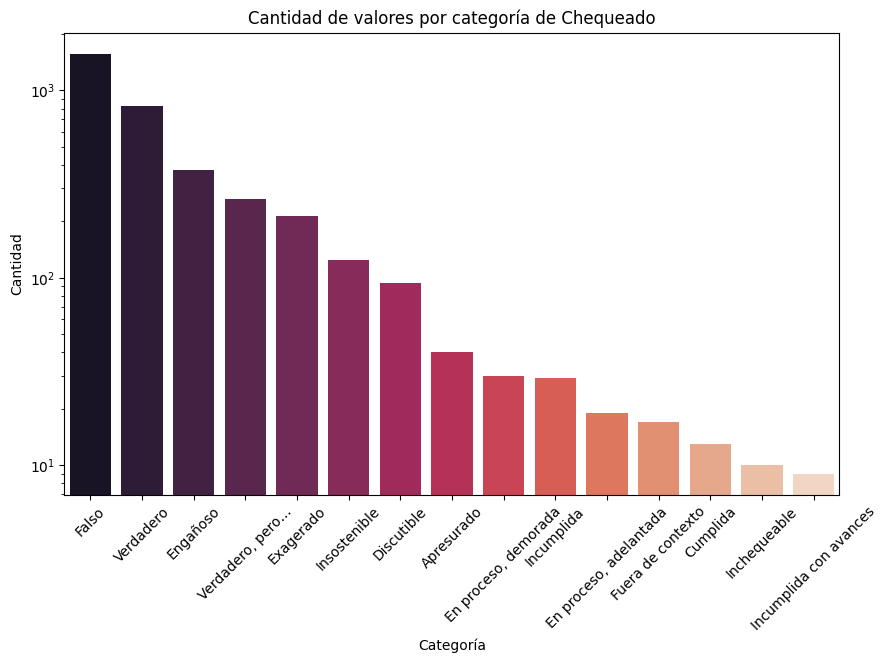

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ch_count.index, y=ch_count.values,hue=ch_count.index, palette='rocket')
plt.yscale('log')
plt.title('Cantidad de valores por categoría de Chequeado')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [41]:
noticia_aleatoria_ch = chequeado.sample().iloc[0]
print("Categoria: ",noticia_aleatoria_ch["Categoria"])
print("Titulo: ", noticia_aleatoria_ch["Titulo"])
print("Texto: ",noticia_aleatoria_ch["Texto"])

Categoria:  Falso
Titulo:  Alberto Fernández: “La OMS recomienda que uno tome muchas bebidas calientes porque el calor mata al virus”
Texto:  nan


#### **Newtral**

In [42]:
newtral_rmx = pd.read_csv("data/newtral.csv",names=['Texto','Autor','Posicion','Categoria'],header=0)
newtral_rmx.head()


,Texto,Autor,Posicion,Categoria
0,“Hay una resolución del Congreso de los Diputa...,Esteban González Pons,Vicesecretario general del PP,Verdad a medias
1,"""Nuestra deuda con el Estado es treinta veces ...",Alfonso Rueda,Presidente de la Xunta de Galicia,Verdadero
2,“Desde el año 2020 le arrebatamos el liderazgo...,Juan Manuel Moreno,Presidente de Andalucía,Verdad a medias
3,“[Impuesto temporal de grandes fortunas y soli...,Isabel Díaz Ayuso,Presidenta de la Comunidad de Madrid,Falso
4,“En esta Cámara yo traje una propuesta de Gobi...,Alberto Núñez Feijóo,Presidente del PP,Verdad a medias


In [43]:
newtral_rmx.shape

(1060, 4)

In [44]:
newtral_rmx["Origen"] = "Newtral"

In [45]:
newtral_rmx.isnull().sum()

Texto         0
Autor         0
Posicion     16
Categoria     0
Origen        0
dtype: int64

In [46]:
nw_count = newtral_rmx["Categoria"].value_counts()
nw_count

Categoria
Falso              464
Engañoso           442
Verdad a medias    141
Verdadero           13
Name: count, dtype: int64

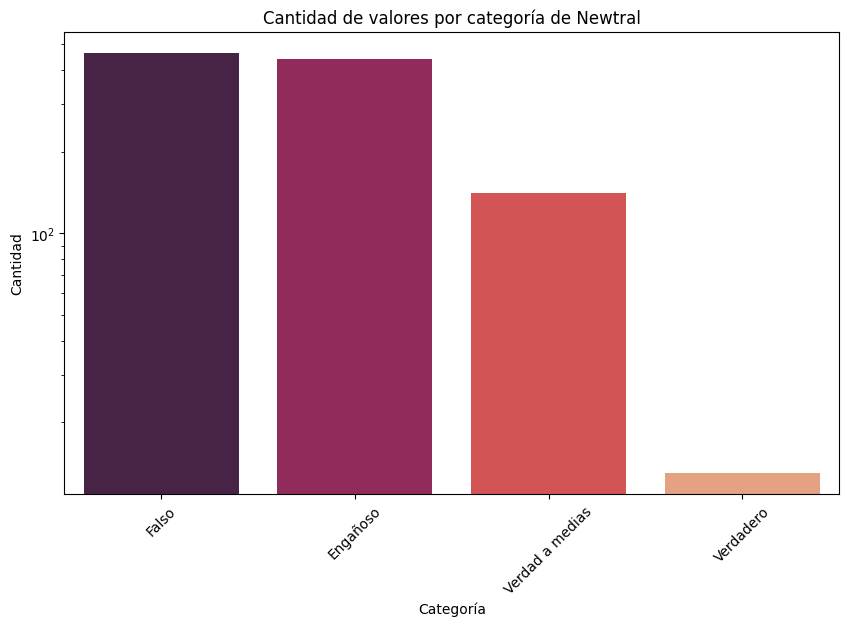

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=nw_count.index, y=nw_count.values,hue=nw_count.index, palette='rocket')
plt.yscale('log')
plt.title('Cantidad de valores por categoría de Newtral')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45) 
plt.show()

In [48]:
noticia_aleatoria_nw = newtral_rmx.sample().iloc[0]
print("Categoria: ",noticia_aleatoria_nw["Categoria"])
print("Autor: ", noticia_aleatoria_nw["Autor"])
print("Texto: ",noticia_aleatoria_nw["Texto"])

Categoria:  Engañoso
Autor:  Jordi Turull
Texto:  “Catalunya, que es el 16% de la población [de España], el 19% de su economía, recibe el 7% de estos fondos [europeos Next Generation]"


### Procesamiento de Chequeado


In [114]:
nuevos_textos = []
nuevas_clasificaciones = []

for index, row in chequeado.iterrows():
    nuevos_textos.extend([row['Titulo'], row['Texto']])
    nuevas_clasificaciones.extend([row['Categoria'], row['Categoria']])

chequeado_new = pd.DataFrame({'clasificacion': nuevas_clasificaciones,'texto': nuevos_textos})

In [115]:
chequeado_new.head(10)


,clasificacion,texto
0,Falso,Son falsos estos resultados de boca de urna ad...
1,Falso,Circulan en redes sociales resultados presiden...
2,Falso,No se divulgaron resultados oficiales previos ...
3,Falso,Se difundieron en redes sociales supuestos pri...
4,Falso,"En el balotaje 2023, las boletas con el número..."
5,Falso,"Miles de usuarios denuncian que, durante la jo..."
6,Falso,Sergio Massa no pronunció la frase “voy a pode...
7,Falso,Decenas de miles de usuarios comparten una pla...
8,Falso,"No, este mural de Lionel Messi no lleva escrit..."
9,Falso,"A pocos días del balotaje, miles de usuarios d..."


In [116]:
chequeado_new = chequeado_new.drop_duplicates(subset='texto').dropna()
chequeado_new.shape

(5647, 2)

In [117]:
chequeado_new.to_csv("./data/chequeado_new.csv", index=False)

### Utilizo OSINTGPT para procesar los datos

#### Genero Embeddings

In [170]:
from osintgpt.embeddings import OpenAIEmbeddingGenerator

In [171]:
env_path = 'osintgpt/.env'

In [172]:
# OpenAIEmbeddingGenerator instance
embedding_generator = OpenAIEmbeddingGenerator(env_file_path=env_path)

In [197]:
embedding_generator.OPENAI_GPT_MODEL="gpt-3.5-turbo"

In [198]:
embedding_generator.get_openai_gpt_model()

'gpt-3.5-turbo'

In [3]:
data = pd.read_csv("data/chequeado_new.csv")
data.head(10)

,clasificacion,texto
0,Falso,Son falsos estos resultados de boca de urna ad...
1,Falso,Circulan en redes sociales resultados presiden...
2,Falso,No se divulgaron resultados oficiales previos ...
3,Falso,Se difundieron en redes sociales supuestos pri...
4,Falso,"En el balotaje 2023, las boletas con el número..."
5,Falso,"Miles de usuarios denuncian que, durante la jo..."
6,Falso,Sergio Massa no pronunció la frase “voy a pode...
7,Falso,Decenas de miles de usuarios comparten una pla...
8,Falso,"No, este mural de Lionel Messi no lleva escrit..."
9,Falso,"A pocos días del balotaje, miles de usuarios d..."


In [4]:
data["clasificacion"].value_counts()

clasificacion
Falso                     2328
Verdadero                 1288
Engañoso                   612
Verdadero, pero…           439
Exagerado                  358
Insostenible               208
Discutible                 175
Apresurado                  65
Incumplida                  40
En proceso, demorada        39
En proceso, adelantada      24
Fuera de contexto           21
Cumplida                    21
Inchequeable                20
Incumplida con avances       9
Name: count, dtype: int64

In [5]:
data['clasificacion'] = data['clasificacion'].replace(['Engañoso', 'Apresurado','Discutible', 'Exagerado','Insostenible'], 'Falso')
data['clasificacion'] = data['clasificacion'].replace(['Verdadero, pero…'], 'Verdadero')

In [6]:
valores_permitidos = ['Verdadero', 'Falso']
data = data[data['clasificacion'].isin(valores_permitidos)]
data["clasificacion"].value_counts()

clasificacion
Falso        3746
Verdadero    1727
Name: count, dtype: int64

In [7]:
data.to_csv("./data/chequeado_procesado.csv", index=False)

In [199]:
data['texto_unido'] = data['clasificacion'] + ' | ' + data['texto']
data.head(10)

,clasificacion,texto,texto_unido
0,Falso,Son falsos estos resultados de boca de urna ad...,Falso | Son falsos estos resultados de boca de...
1,Falso,Circulan en redes sociales resultados presiden...,Falso | Circulan en redes sociales resultados ...
2,Falso,No se divulgaron resultados oficiales previos ...,Falso | No se divulgaron resultados oficiales ...
3,Falso,Se difundieron en redes sociales supuestos pri...,Falso | Se difundieron en redes sociales supue...
4,Falso,"En el balotaje 2023, las boletas con el número...","Falso | En el balotaje 2023, las boletas con e..."
5,Falso,"Miles de usuarios denuncian que, durante la jo...","Falso | Miles de usuarios denuncian que, duran..."
6,Falso,Sergio Massa no pronunció la frase “voy a pode...,Falso | Sergio Massa no pronunció la frase “vo...
7,Falso,Decenas de miles de usuarios comparten una pla...,Falso | Decenas de miles de usuarios comparten...
8,Falso,"No, este mural de Lionel Messi no lleva escrit...","Falso | No, este mural de Lionel Messi no llev..."
9,Falso,"A pocos días del balotaje, miles de usuarios d...","Falso | A pocos días del balotaje, miles de us..."


In [200]:
data.shape

(5473, 3)

In [201]:
text_data = data['texto_unido'].tolist()

In [202]:
embedding_generator.load_text(text_data)

In [203]:
print (f'Numero de Documentos -> {len(text_data)}')

Numero de Documentos -> 5473


In [204]:
n_tokens = embedding_generator.count_tokens()
print (f'Number of tokens -> {n_tokens}')

Number of tokens -> 226438


In [205]:
estimated_cost = embedding_generator.calculate_embeddings_estimated_cost()
print (estimated_cost)


0.0226438


In [206]:
embeddings = embedding_generator.embeddings

In [207]:
type(embeddings)

list

In [208]:
print (text_data[0])

Falso | Son falsos estos resultados de boca de urna adjudicados a 3 consultoras


In [209]:
data['texto_unido'].iloc[0]

'Falso | Son falsos estos resultados de boca de urna adjudicados a 3 consultoras'

In [210]:
data.loc[:, 'embeddings'] = embeddings

In [211]:
# saving dataset
data.to_csv('./data/embeddings_chequeado.csv', index=False, encoding='utf-8')

#### Procesamiento con Modelos

In [33]:
from osintgpt.llms import OpenAIGPT

In [34]:
env_path = './osintgpt/.env'
gpt = OpenAIGPT(env_path)

In [53]:
dataset = pd.read_csv("./data/embeddings_chequeado.csv")
dataset.head(1)

,clasificacion,texto,texto_unido,embeddings
0,Falso,Son falsos estos resultados de boca de urna ad...,Falso | Son falsos estos resultados de boca de...,"[-0.00601120525971055, 0.0071817911230027676, ..."


In [212]:
data_query = data[['texto_unido','embeddings']]
data_query.head(5)


,texto_unido,embeddings
0,Falso | Son falsos estos resultados de boca de...,"[-0.00601120525971055, 0.0071817911230027676, ..."
1,Falso | Circulan en redes sociales resultados ...,"[-0.018522189930081367, -0.0030960054136812687..."
2,Falso | No se divulgaron resultados oficiales ...,"[-0.01463952474296093, -0.012201806530356407, ..."
3,Falso | Se difundieron en redes sociales supue...,"[-0.019067339599132538, -0.015955381095409393,..."
4,"Falso | En el balotaje 2023, las boletas con e...","[-0.015518803149461746, -0.013279899954795837,..."


In [48]:
import ast
import numpy as np

In [ ]:
dataset['embeddings'] = dataset['embeddings'].apply(ast.literal_eval)
dataset['embeddings'] = dataset['embeddings'].apply(np.array)

In [63]:
response_covid = gpt.search_results_from_dataframe(
    data_query,
    query="Genera una lista de temas clave que aborden el COVID",
    text_target_column='texto_unido',
    top_k=10
)

In [70]:
response_covid.keys()

dict_keys(['query', 'query_embedding', 'results'])

In [107]:
# first element of tuple: embeddings of the similar text as query
print (response_covid['results'][0][0][:5])

[-0.011495836079120636, 0.007136478554457426, 0.006355208344757557, -0.017004121094942093, -0.008337927982211113]


In [108]:
# second element of tuple: similar text as query
print (response_covid['results'][0][1])

Engañoso | Es engañosa la lista de recomendaciones sobre qué hacer si te contagiás COVID-19


In [110]:
# third element of tuple: similarity score
print (response_covid['results'][0][2])

0.8440792960405825


In [102]:
query = '''
    Dado un dato con el siguiente formato "Clasificacion | Texto", necesito realizar una transformación en el texto para obtener un nuevo formato "Clasificacion2 | Texto2". En este nuevo formato, Clasificacion2 será la misma que Clasificacion y Texto2 será el texto original modificando la afirmacion para que coincida con la Clasificacion.
    Asumiendo que la premisa escrita en Texto siempre es Verdadera, necesito ajustar dicha afirmacion para que sea consecuente con la Clasificacion, para esto debo negar la afirmacion verdadera de tal manera de volverla Falsa, eliminando las 
    afirmaciones de veracidad/falsedad, negando las afirmaciones afirmativas si la clasificación es Falsa o utilizando antonimos de las palabras en los textos para decir lo opuesto. 

    Ejemplos:
    - Entrada: "Falso | No, es mentira que messi se fue de miami."
    - Salida esperada: "Falso | Messi se fue de miami."
    - Entrada :  "Falso | No, este mural de Lionel Messi no lleva escrito “Aguante Massa”; la foto fue alterada"
    - Salida: "Falso | Este mural de Lionel Messi lleva escrito “Aguante Massa”"
'''

In [133]:
response = gpt.search_results_from_dataframe(
    data_query.iloc[[59]],
    query=query,
    text_target_column='texto_unido',
    top_k=10
)

In [132]:
data_query.iloc[[59]]

,texto_unido,embeddings
59,Falso | Se viralizó un video en redes sociales...,"[-0.02478065900504589, -0.002465389668941498, ..."


##### Agrego Contexto al Modelo

In [111]:
def build_context_from_response(response, query):
    '''
    Args:
        response (dict): The response containing results to be processed.
        query (str): The original query string.

    Returns:
        str: The constructed context string.
    '''
    results = response['results']
    context = f'Query: {query}\n---\nRead the below context delimited by triple backticks to output your response:\n```'
    for res in results:
        text = res[1]
        context += f'\n{text}\n'

    context += '```.\nIf the response cannot be completed, try to analyze keywords and references discussed in such a context.'
    context += '\nRespond in the same language as the original query.'

    return context

#### Analizo estructura oraciones

In [138]:
data_query = data[['texto','embeddings']]
data_query.head(5)

,texto,embeddings
0,Son falsos estos resultados de boca de urna ad...,"[-0.00601120525971055, 0.0071817911230027676, ..."
1,Circulan en redes sociales resultados presiden...,"[-0.018522189930081367, -0.0030960054136812687..."
2,No se divulgaron resultados oficiales previos ...,"[-0.014697274193167686, -0.01223891694098711, ..."
3,Se difundieron en redes sociales supuestos pri...,"[-0.019021114334464073, -0.016424329951405525,..."
4,"En el balotaje 2023, las boletas con el número...","[-0.015544122084975243, -0.0132924634963274, 0..."


In [153]:
query = "Dame ejemplos de las estructuras de oraciones más comunes en el texto. Quiero entender cómo se organizan las oraciones de manera frecuente."

In [ ]:
response = gpt.search_results_from_dataframe(
    data_query,
    query=query,
    text_target_column='texto',
    top_k=10
)

In [150]:
context_str = build_context_from_response(response, query)

In [151]:
model_response = gpt.get_model_completion(context_str)

Response id:  chatcmpl-8mUYeyZj8GrA377t54wJX0mkjshUg
prompt_tokens: 629
completion_tokens: 409
total_tokens: 1038


In [152]:
print (model_response)

En el texto proporcionado, se pueden identificar varias estructuras de oraciones comunes. Aquí hay algunos ejemplos:

1. Oración simple afirmativa: "Los exámenes realizados en la Ciudad y a nivel nacional dan diferentes resultados sobre la comprensión lectora de los estudiantes en el último año de la secundaria."
2. Oración simple interrogativa: "¿De acuerdo con un informe del Observatorio de la ONG Argentinos por la Educación, el 46% de los alumnos de tercer grado de primaria se ubican en el nivel más bajo de lectura?"
3. Oración simple negativa: "No es inusual que los diarios generen grandes titulares basados en estudios de dudosa o nula rigurosidad."
4. Oración compuesta coordinada: "Macri: 'En 2016 la mitad de chicos que terminaba el colegio no comprendía textos. Hoy ocho de cada diez alcanzaron un nivel superior en Lengua'."
5. Oración compuesta subordinada: "Fernández se refirió a los nuevos inscriptos que respondieron el nivel de instrucción de sus padres (hasta nivel secundario

#### Proceso las afirmaciones 


In [214]:
query = '''
    Dado un conjunto de datos de noticias con el siguiente formato "Clasificacion | Texto", necesito realizar una transformación en el texto para obtener un nuevo formato "Clasificacion2 | Texto2". En este nuevo formato, Clasificacion2 será la misma que Clasificacion y Texto2 será el texto original modificando la afirmacion para que coincida con la Clasificacion. Asumiendo que la premisa escrita en Texto siempre es Verdadera, necesito ajustar dicha afirmacion para que sea consecuente con la Clasificacion, para esto debo negar la afirmacion verdadera de tal manera de volverla Falsa, eliminando las afirmaciones de veracidad/falsedad, negando las afirmaciones afirmativas si la clasificación es Falsa o utilizando antonimos de las palabras en los textos para decir lo opuesto. 

    Ejemplos:
    - Entrada: "Falso | No, es mentira que Juan se fue de miami."
    - Salida esperada 1: "Falso | Juan se fue de miami."
    - Salida esperada 2: "Falso | Juan no se queda en miami."
    - Entrada :  "Falso | No, este mural de Lionel Messi no lleva escrito “Aguante Massa”; la foto fue alterada"
    - Salida: "Falso | Este mural de Lionel Messi lleva escrito “Aguante Massa”"
    - Entrada :  "Falso | Son falsos estos resultados de boca de urna adjudicados a 3 consultoras"
    - Salida: "Verdadero | Son falsos estos resultados de boca de urna adjudicados a 3 consultoras”"
    - Entrada :  "Falso | En el balotaje 2023, las boletas con el número de lista arrancado se consideran válidas"
    - Salida esperada 1: "Verdadero | En el balotaje 2023, las boletas con el número de lista arrancado se consideran válidas”"
    - Salida esperada 2: "Verdadero | En el balotaje 2023, las boletas con el número de lista arrancado se consideran inválidas”"
    - Entrada :  "Falso | "Sergio Massa no pronunció la frase “voy a poder con los narcos porque los conozco” en el último debate, ni Infobae la publicó""
    - Salida: "Falso | Sergio Massa pronunció la frase “voy a poder con los narcos porque los conozco” en el último debate según Infobae”"
    - Entrada :  "Falso | "Circula una supuesta placa del diario La Nación con una frase adjudicada al candidato de Unión por la Patria, Sergio Massa, sobre una propuesta de un bono mensual de 350 mil pesos para el colectivo LGBT. Pero No hay registros de la frase ni de la pieza, que muestra inconsistencias con el diseño que suele utilizar el diario en sus redes."
    - Salida: "Falso | Circula una placa del diario La Nación con una frase adjudicada al candidato de Unión por la Patria, Sergio Massa, sobre una propuesta de un bono mensual de 350 mil pesos para el colectivo LGBT."

    '''

In [215]:
data_query = data[['texto_unido','embeddings']]
data_query.head(5)

,texto_unido,embeddings
0,Falso | Son falsos estos resultados de boca de...,"[-0.00601120525971055, 0.0071817911230027676, ..."
1,Falso | Circulan en redes sociales resultados ...,"[-0.018522189930081367, -0.0030960054136812687..."
2,Falso | No se divulgaron resultados oficiales ...,"[-0.01463952474296093, -0.012201806530356407, ..."
3,Falso | Se difundieron en redes sociales supue...,"[-0.019067339599132538, -0.015955381095409393,..."
4,"Falso | En el balotaje 2023, las boletas con e...","[-0.015518803149461746, -0.013279899954795837,..."


In [158]:
response = gpt.search_results_from_dataframe(
    data_query,
    query=query,
    text_target_column='texto_unido',
    top_k=10
)

In [159]:
context_str = build_context_from_response(response, query)

In [160]:
model_response = gpt.get_model_completion(context_str)

Response id:  chatcmpl-8mYnbB4xZSu3K8XzdRvcnq1PRwpDi
prompt_tokens: 973
completion_tokens: 642
total_tokens: 1615


In [161]:
print(model_response)

Salida 1: "Falso | Circulan placas con logos de medios de comunicación que contienen presuntas frases que involucran a políticos, artistas, deportistas y demás personalidades. No es una práctica habitual para generar y difundir desinformaciones, ya que requiere mínimos esfuerzos de edición y no suele viralizarse rápido. Consejos para caer en contenidos falsos."

Salida 2: "Falso | Cómo darte cuenta si una frase plasmada en una placa que imita el estilo de un medio de comunicación en redes sociales es verdadera"

Salida 3: "Engañoso | El diario manipula una frase del ministro de Trabajo, Carlos Tomada, para hacer que diga lo que dijo."

Salida 4: "Engañoso | La afirmación no es parte de las conclusiones de una encuesta de la agencia Kantar TNS y no fue levantada en una nota del diario. Sin embargo, el artículo publicado tiene errores conceptuales que no resultan en un mensaje alarmista y que no fomentan la medicación de individuos sanos."

Salida 5: "Engañoso | En una misma producción a

In [218]:
def procesar_afirmaciones(dataset,query,gpt,text_target="texto"):
    data_response = []
    for i in range(dataset.shape[0]):
        response = gpt.search_results_from_dataframe(
            dataset.iloc[[i]],
            query=query,
            text_target_column=text_target,
            top_k=10
        )
        context_str = build_context_from_response(response, query)
        model_response = gpt.get_model_completion(context_str)
        data_response.append(model_response)
    return data_response

In [219]:
model_response = procesar_afirmaciones(data_query,query,gpt,"texto_unido")

Response id:  chatcmpl-8mZgsqcBGP01Gx6VdN4ns2l6Vnzq0
prompt_tokens: 829
completion_tokens: 28
total_tokens: 857
Response id:  chatcmpl-8mZgv04csV3nk9kBRKwIR0fxSwvKh
prompt_tokens: 885
completion_tokens: 144
total_tokens: 1029
Response id:  chatcmpl-8mZh6rR6lTiJkiGCzbi6ojP80T2Rs
prompt_tokens: 833
completion_tokens: 30
total_tokens: 863


RateLimitError: Rate limit reached for text-embedding-ada-002 in organization org-GcE66YVdQ4DGP7c3wngUD1K5 on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.

In [220]:
model_response

'Salida 1: "Falso | Circulan placas con logos de medios de comunicación que contienen presuntas frases que involucran a políticos, artistas, deportistas y demás personalidades. No es una práctica habitual para generar y difundir desinformaciones, ya que requiere mínimos esfuerzos de edición y no suele viralizarse rápido. Consejos para caer en contenidos falsos."\n\nSalida 2: "Falso | Cómo darte cuenta si una frase plasmada en una placa que imita el estilo de un medio de comunicación en redes sociales es verdadera"\n\nSalida 3: "Engañoso | El diario manipula una frase del ministro de Trabajo, Carlos Tomada, para hacer que diga lo que dijo."\n\nSalida 4: "Engañoso | La afirmación no es parte de las conclusiones de una encuesta de la agencia Kantar TNS y no fue levantada en una nota del diario. Sin embargo, el artículo publicado tiene errores conceptuales que no resultan en un mensaje alarmista y que no fomentan la medicación de individuos sanos."\n\nSalida 5: "Engañoso | En una misma pro